<a href="https://www.kaggle.com/code/roninnapoletano/mgl8707-spambase?scriptVersionId=137896863" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Jeu de données**

Ce jeu est tiré de UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/dataset/94/spambase)

# **Contexte**
Dans le contexte actuel de communication, les e-mails jouent un rôle essentiel dans les échanges professionnels et personnels. Malheureusement, les e-mails de spam représentent une menace.

C'est dans ce contexte que le projet de détection d'e-mails de spam ou non-spam prend  son sens. L'objectif est de développer un système de détection efficace qui peut automatiquement identifier et filtrer les e-mails de spam, tout en minimisant les faux positifs.



In [2]:
dataset = pd.read_csv("/kaggle/input/spambase/spambase_csv.csv")

dataset_copie = dataset.copy(deep=True)
target = 'spam'
labels = ['Ham','Spam']
features = [i for i in dataset.columns.values if i not in [target]]


# 1 :**Exploration des données**

Exploration du jeu de données
* Quels sont les types de données que nous avons ?
* Certaines données sont-elles manquantes ?
* Quelle est la répartition des données ?



In [3]:
dataset.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [4]:
dataset.head(n=10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


In [5]:
print(f'Dans ce jeu de données nous avons {dataset.shape[0]} lignes et {dataset.shape[1]} colonnes')
print(f'Avons-nous des données manquantes ? {dataset.isna().any()}')

Dans ce jeu de données nous avons 4601 lignes et 58 colonnes
Avons-nous des données manquantes ? word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
wor

In [6]:
print(f'Nos types de données')
dataset.info ()

Nos types de données
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_re

In [7]:
dataset.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [8]:
dataset.sample(n = 10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
265,0.14,0.14,0.29,0.0,0.00,0.00,0.00,0.0,1.17,0.29,...,0.000,0.204,0.000,0.204,0.127,0.102,2.962,73,400,1
4195,0.00,0.00,1.39,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.000,0.122,0.000,0.000,0.000,0.000,1.963,47,108,0
1399,0.00,0.72,0.00,0.0,2.89,0.00,0.00,0.0,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.379,7,40,1
4064,0.00,0.00,0.59,0.0,0.19,0.00,0.00,0.0,0.00,0.00,...,0.000,0.232,0.000,0.000,0.038,0.000,1.129,4,96,0
3201,0.26,0.00,0.53,0.0,0.00,0.26,0.00,0.0,0.00,0.00,...,0.000,0.039,0.000,0.000,0.000,0.000,2.646,77,172,0
352,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.000,0.000,0.000,0.230,0.230,0.000,5.538,41,72,1
3924,0.12,0.00,0.12,0.0,0.12,0.00,0.00,0.0,1.11,0.00,...,0.083,0.167,0.033,0.000,0.033,0.000,3.211,32,485,0
1739,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,3.70,...,0.258,0.000,0.000,1.550,0.000,0.000,4.555,13,82,1
2229,0.39,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.39,...,0.000,0.104,0.052,0.000,0.000,0.052,3.153,57,246,0
696,0.00,0.33,0.33,0.0,1.65,0.33,0.66,0.0,0.00,0.16,...,0.000,0.024,0.074,0.248,0.049,0.049,6.161,350,727,1


In [9]:
dataset.nunique().sort_values()

class                            2
word_freq_table                 38
word_freq_3d                    43
word_freq_parts                 53
word_freq_font                  99
word_freq_conference           106
word_freq_857                  106
word_freq_cs                   108
word_freq_415                  110
word_freq_receive              113
word_freq_addresses            118
word_freq_direct               125
word_freq_telnet               128
word_freq_report               133
word_freq_original             136
word_freq_over                 141
word_freq_make                 142
word_freq_money                143
word_freq_order                144
word_freq_credit               148
word_freq_lab                  156
word_freq_people               158
word_freq_technology           159
word_freq_project              160
word_freq_pm                   163
word_freq_000                  164
word_freq_internet             170
word_freq_address              171
word_freq_remove    

In [10]:
nu = dataset[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; 

for i in range(dataset[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m Le Datset a {} valeurs numériques & {} categorical features.'.format(len(nf),len(cf)))


Inference: Le Datset a 57 valeurs numériques & 1 categorical features.


# **2. Distrubution et relations entre les données**

         Distribution des Spam et Non-Spam         


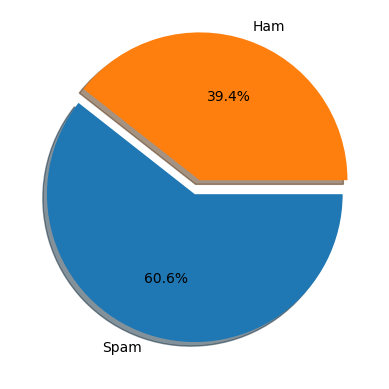

In [11]:

MAP={}
for e, i in enumerate(dataset['class'].unique()):
    MAP[i]=labels[e]
    
dataset1 = dataset.copy()
dataset1[target]=dataset1['class'].map(MAP)

explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mDistribution des Spam et Non-Spam'.center(55))
plt.pie(dataset1[target].value_counts(), labels=dataset1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

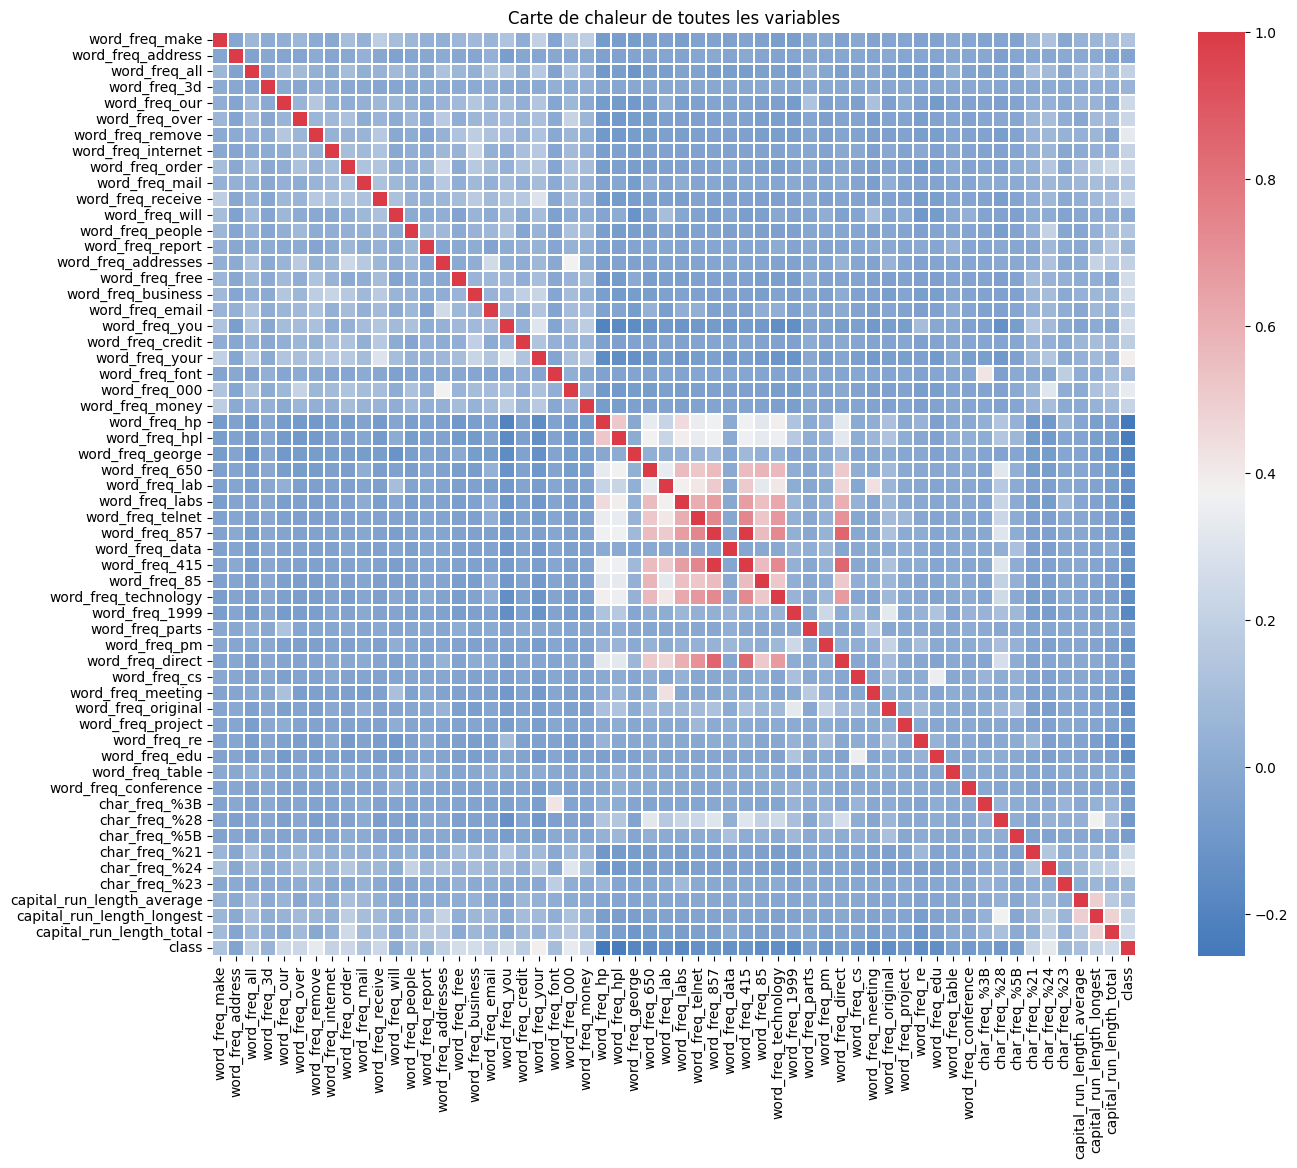

In [12]:
corr=dataset.corr()
plt.figure(figsize=(16, 12))
ax=sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap=sns.diverging_palette(250, 10, as_cmap=True),
            square=True,
            linewidths=.1)
ax.set(title="Carte de chaleur de toutes les variables");



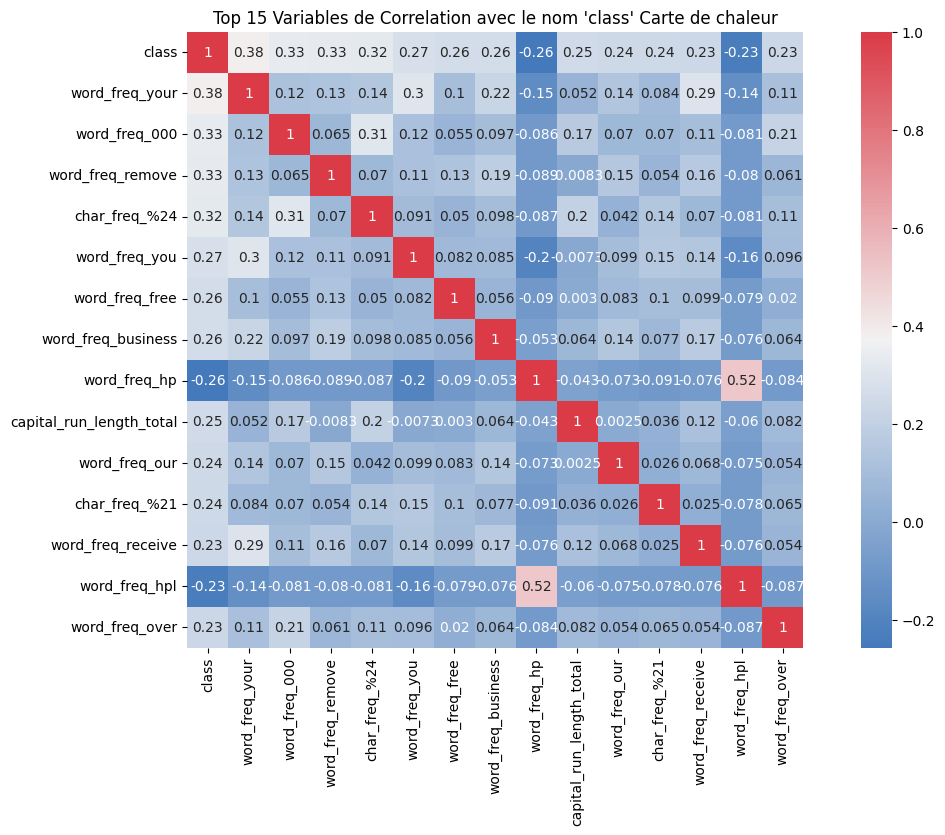

In [13]:
k = 15 # Nombre de variables les plus corrélées à considérer

# Sélection des colonnes les plus corrélées avec la variable "class"
cols = corr.abs().nlargest(k, 'class')['class'].index

# Calcul de la matrice de corrélation pour les colonnes sélectionnées
cm = np.corrcoef(dataset[cols].values.T)

# Création du graphique de corrélation
plt.figure(figsize=(15, 8))
ax = sns.heatmap(cm, yticklabels=cols.values, xticklabels=cols.values,
                 cmap=sns.diverging_palette(250, 10, as_cmap=True),
                 annot=True, square=True)
ax.set(title=f"Top {k} Variables de Correlation avec le nom 'class' Carte de chaleur")
plt.show()

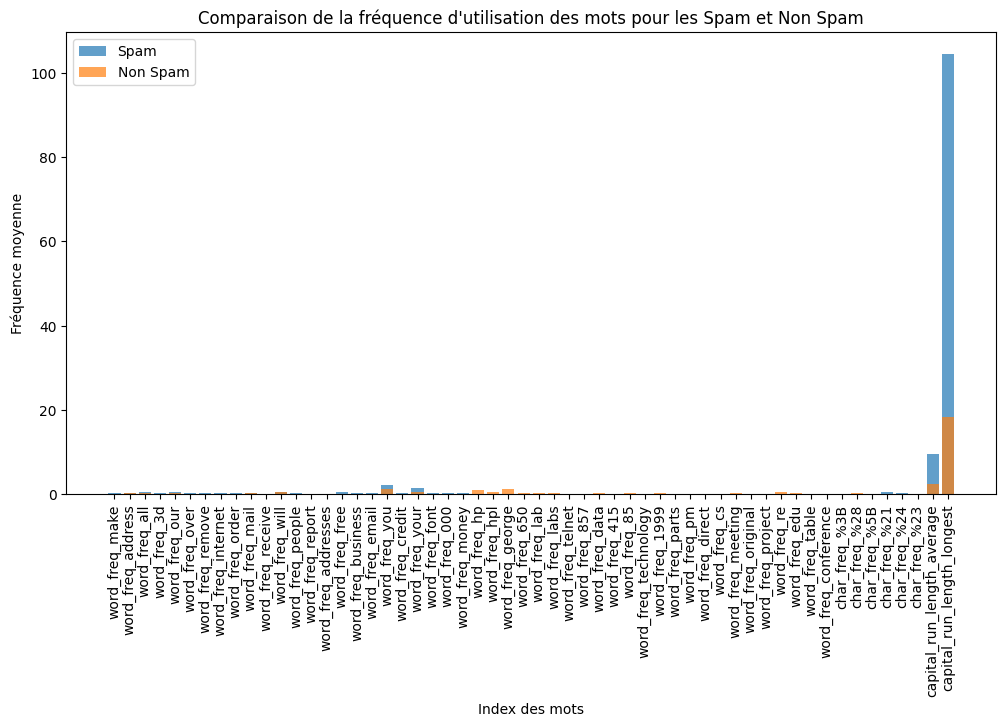

In [14]:
spam_data = dataset[dataset['class'] == 1]  # Colonne 57 indiquant la classe (1 pour spam)
non_spam_data = dataset[dataset['class'] == 0]  # Colonne 57 indiquant la classe (0 pour non spam)

# Calculer la fréquence moyenne des mots pour les e-mails spam et non spam
spam_word_frequency = spam_data.iloc[:, :56].mean(axis=0)
non_spam_word_frequency = non_spam_data.iloc[:, :56].mean(axis=0)

column_names = dataset.columns[:56] 

# Plot des histogrammes pour la fréquence d'utilisation des mots
plt.figure(figsize=(12, 6))
plt.bar(range(len(spam_word_frequency)), spam_word_frequency, alpha=0.7, label='Spam')
plt.bar(range(len(non_spam_word_frequency)), non_spam_word_frequency, alpha=0.7, label='Non Spam')
plt.xlabel("Index des mots")
plt.ylabel("Fréquence moyenne")
plt.title("Comparaison de la fréquence d'utilisation des mots pour les Spam et Non Spam")
plt.xticks(range(len(column_names)), column_names, rotation='vertical') 
plt.legend()
plt.show()

Afin d'avoir une visualtion plus précsie, nous supprimons les 2 plus grandes valeurs

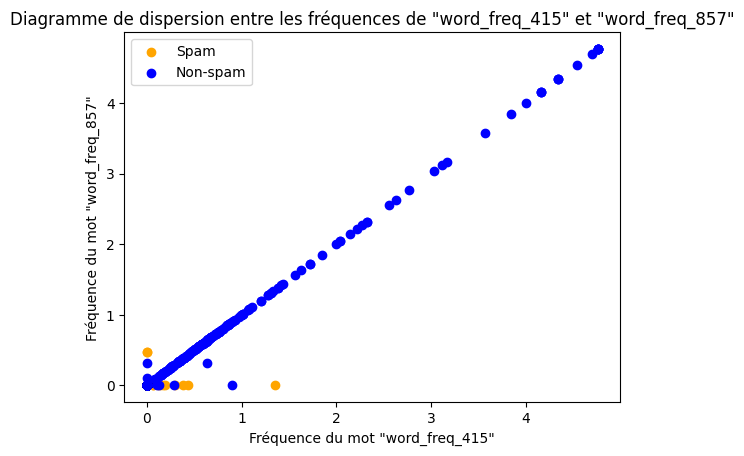

In [15]:

# Diagramme de dispersion 
plt.scatter(spam_data['word_freq_415'], spam_data['word_freq_857'], color='orange', label='Spam')
plt.scatter(non_spam_data['word_freq_415'], non_spam_data['word_freq_857'], color='blue', label='Non-spam')


plt.xlabel('Fréquence du mot "word_freq_415"')
plt.ylabel('Fréquence du mot "word_freq_857"')
plt.title('Diagramme de dispersion entre les fréquences de "word_freq_415" et "word_freq_857"')
plt.legend()

plt.show()

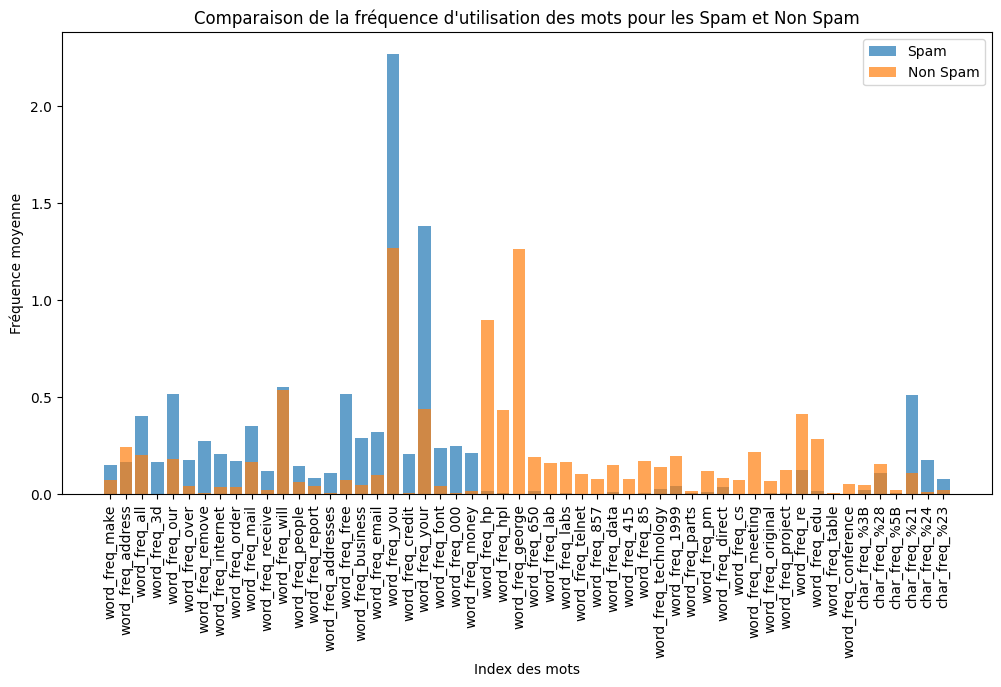

In [16]:

# Calculer la fréquence moyenne des mots pour les e-mails spam et non spam
spam_word_frequency = spam_data.iloc[:, :54].mean(axis=0)
non_spam_word_frequency = non_spam_data.iloc[:, :54].mean(axis=0)

column_names = dataset.columns[:54] 

# Plot des histogrammes pour la fréquence d'utilisation des mots
plt.figure(figsize=(12, 6))
plt.bar(range(len(spam_word_frequency)), spam_word_frequency, alpha=0.7, label='Spam')
plt.bar(range(len(non_spam_word_frequency)), non_spam_word_frequency, alpha=0.7, label='Non Spam')
plt.xlabel("Index des mots")
plt.ylabel("Fréquence moyenne")
plt.title("Comparaison de la fréquence d'utilisation des mots pour les Spam et Non Spam")
plt.xticks(range(len(column_names)), column_names, rotation='vertical') 
plt.legend()
plt.show()

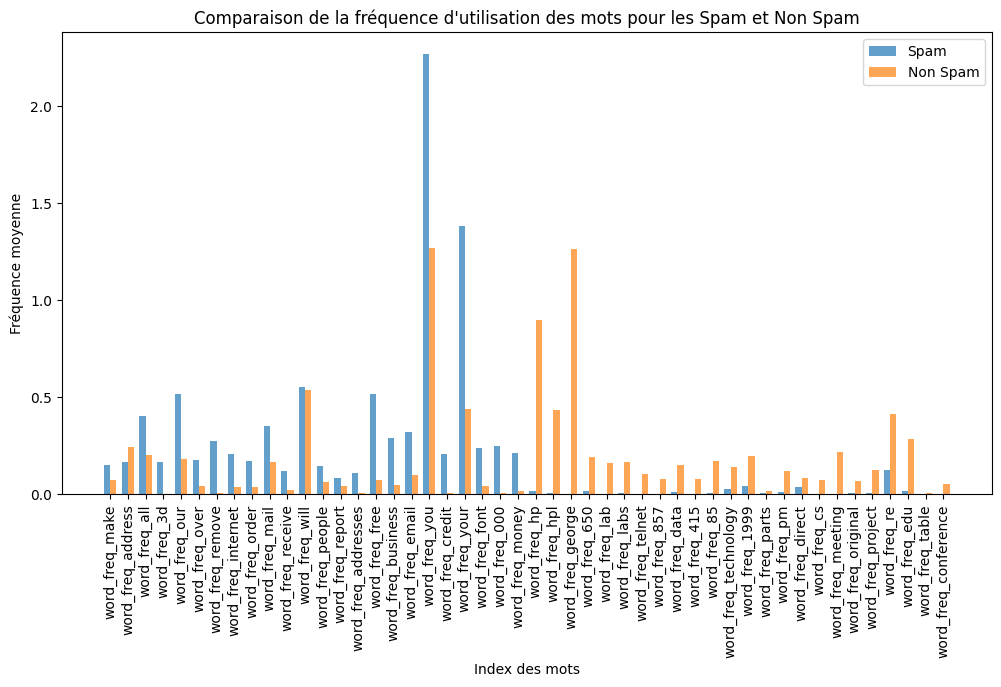

In [17]:
spam_data = dataset[dataset['class'] == 1]  
non_spam_data = dataset[dataset['class'] == 0]  

# Calculer la fréquence moyenne des mots pour les e-mails spam et non spam
spam_word_frequency = spam_data.iloc[:, :48].mean(axis=0)
non_spam_word_frequency = non_spam_data.iloc[:, :48].mean(axis=0)

column_names = dataset.columns[:48] 

# Paramètres de la taille du graphique
fig, ax = plt.subplots(figsize=(12, 6))  
bar_width = 0.35
positions = np.arange(len(column_names))

ax.bar(positions - bar_width/2, spam_word_frequency, bar_width, alpha=0.7, label='Spam')
ax.bar(positions + bar_width/2, non_spam_word_frequency, bar_width, alpha=0.7, label='Non Spam')
ax.set_xlabel("Index des mots")
ax.set_ylabel("Fréquence moyenne")
ax.set_title("Comparaison de la fréquence d'utilisation des mots pour les Spam et Non Spam")
ax.set_xticks(positions)
ax.set_xticklabels(column_names, rotation='vertical')
ax.legend()

plt.show()

In [18]:
pivot_class_freq=pd.pivot_table(dataset,values=dataset.drop(["class","capital_run_length_average","capital_run_length_longest","capital_run_length_total"],axis=1),index='class',aggfunc="mean")
pivot_class_freq

,char_freq_%21,char_freq_%23,char_freq_%24,char_freq_%28,char_freq_%3B,char_freq_%5B,word_freq_000,word_freq_1999,word_freq_3d,word_freq_415,...,word_freq_re,word_freq_receive,word_freq_remove,word_freq_report,word_freq_table,word_freq_technology,word_freq_telnet,word_freq_will,word_freq_you,word_freq_your
class,,,,,,,,,,,,,,,,,,,,,
0,0.109984,0.021713,0.011648,0.158578,0.050281,0.022684,0.007088,0.197744,0.000886,0.077787,...,0.415760,0.021711,0.009383,0.042403,0.008192,0.141671,0.106033,0.536324,1.270341,0.438702
1,0.513713,0.078877,0.174478,0.108970,0.020573,0.008199,0.247055,0.043469,0.164672,0.001776,...,0.125091,0.118434,0.275405,0.083574,0.001219,0.029515,0.001274,0.549972,2.264539,1.380370


# **3. Ingénierie des caractéristiques (Feature engineering)**

In [19]:
dataset['combined_415_857_log'] = np.log(dataset['word_freq_415'] + 1) * np.log(dataset['word_freq_857'] + 1)
dataset['combined_415_857'] = dataset['word_freq_415'] + dataset['word_freq_857']

dataset['combined_hp_hpl_log'] = np.log(dataset['word_freq_hp'] + 1) * np.log(dataset['word_freq_hpl'] + 1)
dataset['combined_hp_hpl'] = dataset['word_freq_hp'] + dataset['word_freq_hpl']


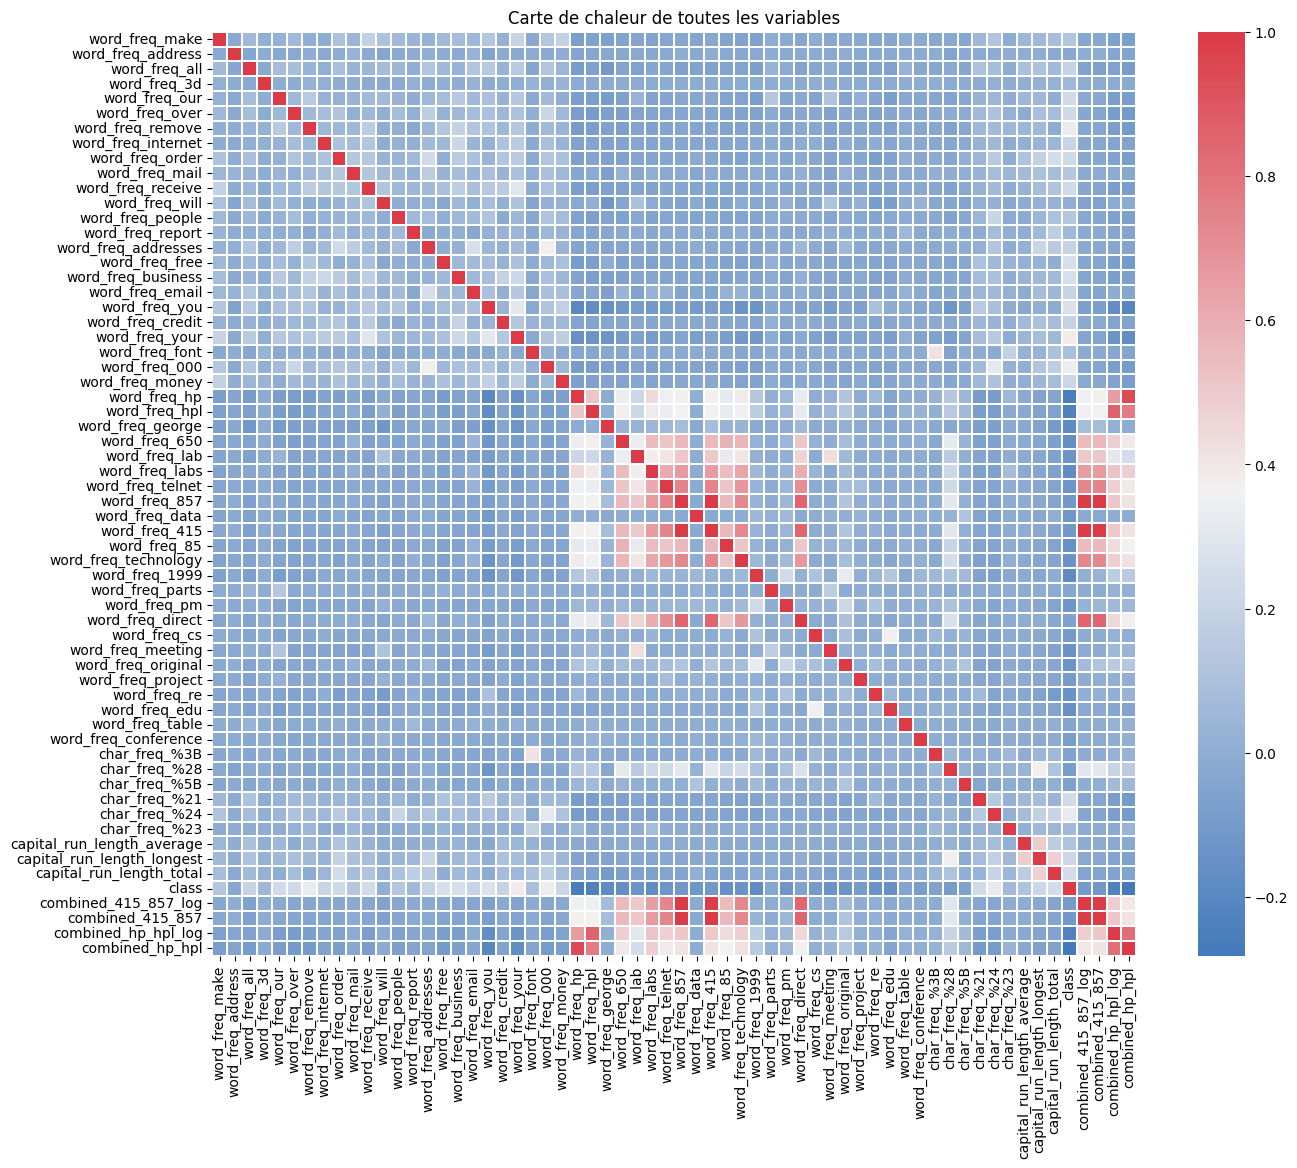

In [20]:
corr=dataset.corr()
plt.figure(figsize=(16, 12))
ax=sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap=sns.diverging_palette(250, 10, as_cmap=True),
            square=True,
            linewidths=.1)
ax.set(title="Carte de chaleur de toutes les variables");


# **Prétraitement des données**

In [21]:
#Commencons par supprimer les valeurs dupliquées 

compteur = 0

# Obtention des dimensions de original_dataset
r, c = dataset.shape

# Copie de original_dataset dans dataset1
datasetCopie1 = dataset.copy()

# Suppression des duplications dans dataset1
datasetCopie1.drop_duplicates(inplace=True)

# Réinitialisation des index dans dataset1
datasetCopie1.reset_index(drop=True, inplace=True)

# Vérification s'il y a eu des duplications
if datasetCopie1.shape == (r, c):
    print('\nLe jeu de données ne contient pas de duplications.')
else:
    print(f'\n\033[1mInference:\033[0m Nombre de duplications supprimées : {r - datasetCopie1.shape[0]}')



Inference: Nombre de duplications supprimées : 391


Gestion des déséquilibre  des classes

In [22]:
datasetCopie2 = dataset1.copy()

print('Distribution de base :')
print(datasetCopie2[target].value_counts())

# Séparation des colonnes et de la colonne cible
col = datasetCopie2.columns
X = datasetCopie2.drop([target], axis=1)
Y = datasetCopie2[target]

# Application de la Technique SMOTE pour équilibrer les classes
smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

# Reconstruction du DataFrame avec les nouvelles données
datasetCopie2 = pd.DataFrame(X, columns=col)
datasetCopie2[target] = Y

# Affichage de la distribution après l'application de SMOTE
print('\nApplication de la Technique SMOTE :')
print(Y.value_counts())

Distribution de base :
Spam    2788
Ham     1813
Name: spam, dtype: int64

Application de la Technique SMOTE :
Ham     2788
Spam    2788
Name: spam, dtype: int64


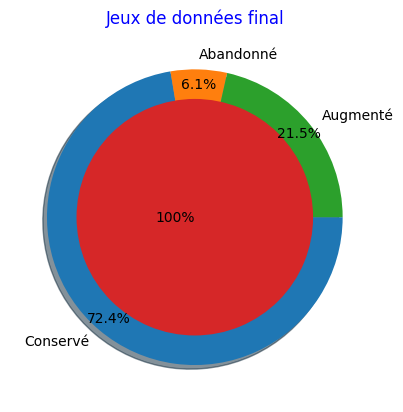


Inference: Le jeu de données final après nettoyage contient 62 colonnes & 4601 lignes.


In [23]:

# Affichage du graph
plt.title('Jeux de données final', color='blue')
plt.pie([dataset.shape[0], dataset.shape[0] - datasetCopie1.shape[0], datasetCopie2.shape[0] - datasetCopie1.shape[0]], radius=1, shadow=True,
        labels=['Conservé', 'Abandonné', 'Augmenté'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0, 0, 0])
plt.pie([dataset.shape[0]], labels=['100%'], labeldistance=-0, radius=0.8, shadow=True)
plt.show()

# Affichage de la conclusion
print('\n\033[1mInference:\033[0m Le jeu de données final après nettoyage contient {} colonnes & {} lignes.'.format(dataset.shape[1], dataset.shape[0]))